<a href="https://colab.research.google.com/github/msdelaram/imageclassification/blob/main/cnn_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***all projects steps:***
1.	Load the libraries
2.	Load the dataset
3.	Visualize the dataset (heatmap)
4.	Split the data into train and test set
5.	Feature scaling
6.	Train the model
7.	Predict the test set result
8.	Visualize the train set result
9.	Visualize the test set result
10.	Evaluate the model by creating a confusion matrix ( classification ) 


In [ ]:
import pandas as pd
import numpy
from tensorflow import keras
from keras.constraints import maxnorm
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt
     

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

# **preprocessing**

---



In [ ]:

# Normalize the inputs from 0-255 to between 0 and 1 by dividing by 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#scaling
X_train = X_train / 255.0
X_test = X_test / 255.0
     

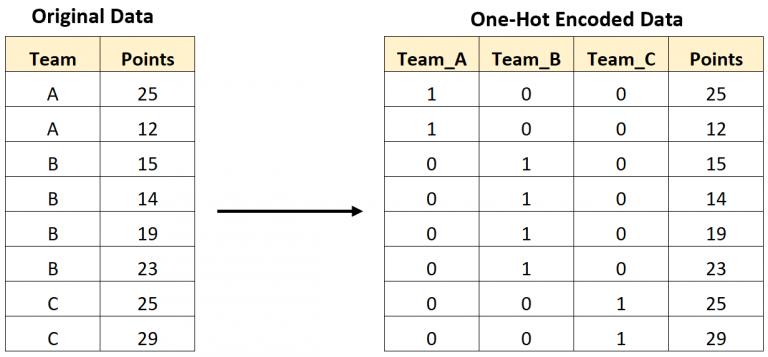

In [ ]:

# One-hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
num_class = y_test.shape[1] #10

# **bulding the model**

---



In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=X_train.shape[1:], activation='relu'))# feature extraction
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))# feature extraction
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))# feature extraction
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))# feature extraction
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())# flatten layer
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))# here cnn learning from danse layer
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(num_class, activation = 'softmax'))#probabilistic //final layer

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
     

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

# **Training model **

---



In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=64)
     

Epoch 1/30
782/782 [==============================] - 25s 14ms/step - loss: 1.5092 - accuracy: 0.4610 - val_loss: 1.2356 - val_accuracy: 0.5632
Epoch 2/30
782/782 [==============================] - 10s 12ms/step - loss: 1.0758 - accuracy: 0.6254 - val_loss: 0.8765 - val_accuracy: 0.6908
Epoch 3/30
782/782 [==============================] - 10s 13ms/step - loss: 0.9161 - accuracy: 0.6808 - val_loss: 0.7605 - val_accuracy: 0.7313
Epoch 4/30
782/782 [==============================] - 11s 13ms/step - loss: 0.8193 - accuracy: 0.7159 - val_loss: 0.7747 - val_accuracy: 0.7281
Epoch 5/30
782/782 [==============================] - 10s 13ms/step - loss: 0.7621 - accuracy: 0.7339 - val_loss: 0.7158 - val_accuracy: 0.7553
Epoch 6/30
782/782 [==============================] - 10s 12ms/step - loss: 0.7165 - accuracy: 0.7508 - val_loss: 0.6852 - val_accuracy: 0.7617
Epoch 7/30
782/782 [==============================] - 10s 12ms/step - loss: 0.6766 - accuracy: 0.7666 - val_loss: 0.6868 - val_accuracy:

In [ ]:
import pandas as pd

<AxesSubplot:>

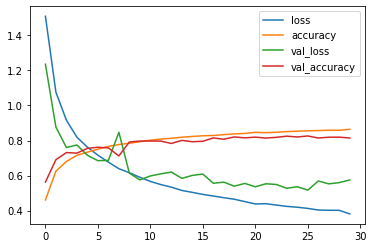

In [ ]:
pd.DataFrame(history.history).plot()

<function matplotlib.pyplot.show(close=None, block=None)>

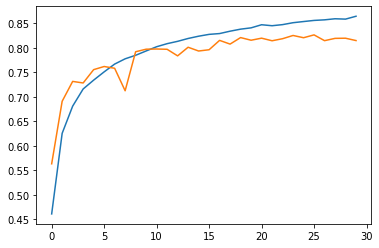

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show
     

In [ ]:
import numpy as np
import seaborn as sns; sns.set()

313/313 [==============================] - 1s 2ms/step


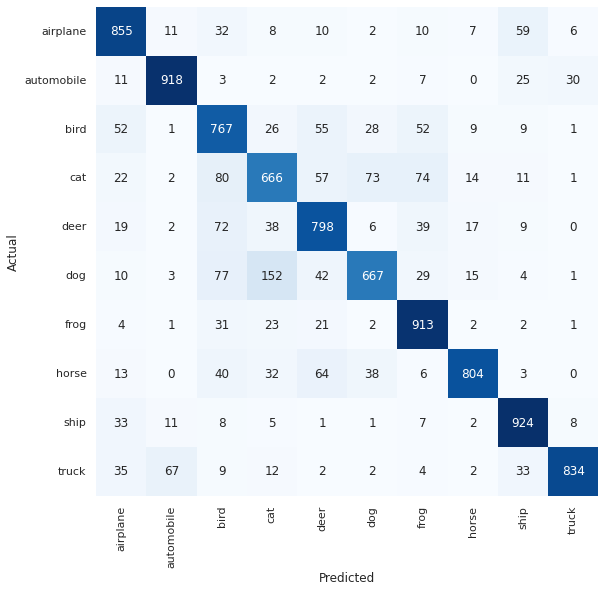

In [ ]:

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# Predicting test data
predictions = model.predict(X_test)

predictions = np.argmax(predictions, axis = 1)

#y_test = np.argmax(y_test, axis = 1)


# Creating confusion matrix 

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
     

**this code is for usefull**



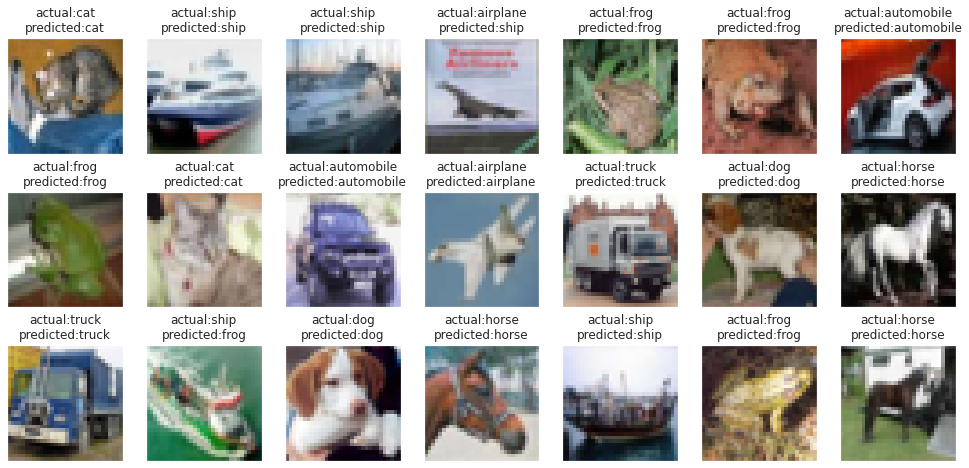

In [ ]:
y_test = y_test.astype(int)
predictions = predictions.astype(int)

fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + labels[y_test[index]] + '\n' + 'predicted:' + labels[predictions[index]])
        axes[i,j].imshow(X_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()